In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)

In [3]:
#data = pd.read_csv('/content/drive/MyDrive/PTSD /PTSD_final.csv')
data = pd.read_csv('PTSD_final.csv')

In [4]:
data

,Unnamed: 0,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,freezing_recall5,date_recall5,condition,sex,dob,date_sefla,age_selfa
0,0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,6.61,21.0,3.92,35.0,control,male,2021-02-16,2021-04-28,71
1,1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,2.24,21.0,3.74,35.0,control,male,2021-02-16,2021-04-28,71
2,2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,7.30,21.0,4.00,35.0,control,male,2021-02-16,2021-04-28,71
3,3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,14.89,21.0,22.82,35.0,control,male,2021-02-16,2021-04-28,71
4,4,ptsd2_84,50.64,10.14,1,25.39,2,27.24,5,11.23,7,5.62,21.0,17.64,35.0,sefl,male,2021-02-16,2021-04-28,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,ptsd9_29-2,63.66,33.77,1,19.53,2,47.70,9,43.75,16,33.71,30.0,NaN,NaN,sefl,male,2021-10-13,2022-01-12,91
70,70,ptsd9_29-5,47.50,35.16,1,70.82,2,63.19,9,35.71,16,56.43,30.0,NaN,NaN,sefl,male,2021-10-13,2022-01-12,91
71,71,ptsd9_30-1,64.57,15.88,1,32.56,2,48.10,9,29.46,16,15.14,30.0,NaN,NaN,sefl,male,2021-10-13,2022-01-12,91
72,72,ptsd9_31-1,64.38,26.80,1,52.61,2,53.21,9,31.25,16,53.20,30.0,NaN,NaN,sefl,male,2021-10-13,2022-01-12,91


# Data Wrangling



In [3]:
### test_1 is the first machine learning experiment
test_1 = data.copy()
# test_1.drop(columns=['freezing_recall5','date_recall5','dob','date_sefla','Unnamed: 0'], inplace = True)
test_1_sefl = test_1[test_1['condition']=='sefl']
test_1_sefl = test_1_sefl.drop(['condition','Unnamed: 0'], axis=1)
# sex=1 male; sex=0, female
# age=1 old(days from dob to sefla >84 days); age=0 young(days from dob to sefla <= 84days)
test_1_sefl['sex'] = test_1_sefl['sex'].replace({'male': 1, 'female': 0})
test_1_sefl['age_selfa'].astype(int)
test_1_sefl['age_selfa'] = (test_1_sefl['age_selfa'] > 84).astype(int)
test_1_sefl = test_1_sefl.drop(columns = ['dob','date_sefla'])

# Visualization Part

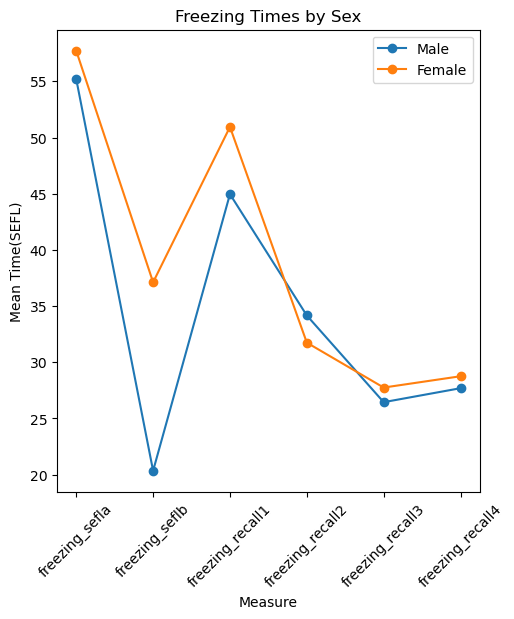

In [4]:
df = test_1_sefl.copy()
# Recalculating with inclusion of freezing sefla and freezing seflb
# For both sex and age groups
# Adding to the original calculation for comparison

# Recalculate means for sex categories
male_means = df[df['sex'] == 1][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()
female_means = df[df['sex'] == 0][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Sex
plt.subplot(1, 2, 2)
plt.plot(male_means.index, male_means.values, label='Male', marker='o')
plt.plot(female_means.index, female_means.values, label='Female', marker='o')
plt.title('Freezing Times by Sex')
plt.xlabel('Measure')
plt.ylabel('Mean Time(SEFL)')
plt.xticks(rotation=45)
plt.legend()

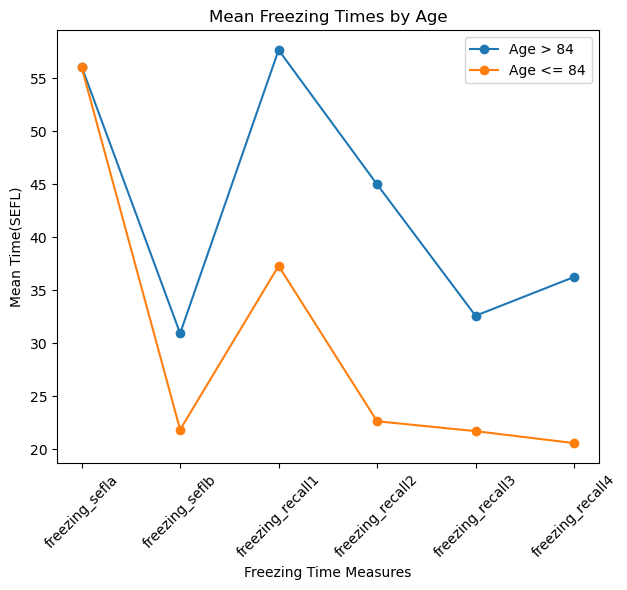

In [5]:
# Calculating mean freezing times for age above 84 and below or equal to 100
age_above_84_means = df[df['age_selfa']==1][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()
age_below_84_means = df[df['age_selfa']==0][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()
# Plotting
plt.figure(figsize=(12, 6))
# Plot for age
plt.subplot(1, 2, 2)
plt.plot(age_above_84_means, label='Age > 84', marker='o')
plt.plot(age_below_84_means, label='Age <= 84', marker='o')
plt.title('Mean Freezing Times by Age')
plt.xlabel('Freezing Time Measures')
plt.ylabel('Mean Time(SEFL)')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# SEFL Group


## Training without Learning curve

In [10]:
test_1_sefl = test_1_sefl.drop(columns = ['freezing_recall5','date_recall5'])

In [76]:
from sklearn.model_selection import train_test_split
X = test_1_sefl.drop(columns = ['cohort_id','date_recall1','freezing_recall4'])
y = test_1_sefl['freezing_recall4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
import random
random.seed(12)

###OLS

In [78]:
import statsmodels.api as sm

# Adding a constant to the X_train and X_test for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Creating the model
ols_model = sm.OLS(y_train, X_train_sm)

# Fitting the model
ols_results = ols_model.fit()

# Calculate MSE for training data
y_train_pred = ols_results.predict(X_train_sm)
mse_train = sm.tools.eval_measures.mse(y_train, y_train_pred)

# Calculate MSE for test data
y_test_pred = ols_results.predict(X_test_sm)
mse_test = sm.tools.eval_measures.mse(y_test, y_test_pred)

# Getting a summary of the model
ols_summary = ols_results.summary()
ols_summary, mse_train, mse_test

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       freezing_recall4   R-squared:                       0.404
 Model:                            OLS   Adj. R-squared:                  0.166
 Method:                 Least Squares   F-statistic:                     1.697
 Date:                Fri, 02 Aug 2024   Prob (F-statistic):              0.137
 Time:                        11:09:38   Log-Likelihood:                -134.64
 No. Observations:                  36   AIC:                             291.3
 Df Residuals:                      25   BIC:                             308.7
 Df Model:                          10                                         
 Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------

In [79]:
# Perform OLS regression
model = sm.OLS(y_train, X_train_sm).fit()

# Get the summary of the regression
model_summary = model.summary()

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       freezing_recall4   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     1.697
Date:                Fri, 02 Aug 2024   Prob (F-statistic):              0.137
Time:                        11:09:38   Log-Likelihood:                -134.64
No. Observations:                  36   AIC:                             291.3
Df Residuals:                      25   BIC:                             308.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
freezing_sefla       0.1332      0.189      0.704      0.488      -0.256       0.523
freezing_seflb      -0.0906      0.269     -0.337      0.739      -0.644       0.463
date_seflb          -5.2287     16.804     -0.311      0.758     -39.837      29.380
freezing_recall1     0.2901      0.172      1.689      0.104      -0.064       0.644
freezing_recall2    -0.2846      0.256     -1.113      0.276      -0.811       0.242
date_recall2        -1.0433      2.564     -0.407      0.687      -6.323       4.236
freezing_recall3     0.4038      0.260      1.553      0.133      -0.132       0.939
date_recall3         0.7687      1.979      0.388      0.701      -3.307       4.844
date_recall4         0.2367      1.036      0.228      0.821      -1.898       2.371
sex                 -0.2796     10.493     -0.027      0.979     -21.890      21.331
age_selfa            7.8371      6.089      1.287      0.210      -4.703      20.378
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.728
Skew:                           0.510   Prob(JB):                        0.421
Kurtosis:                       2.666   Cond. No.                         847.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

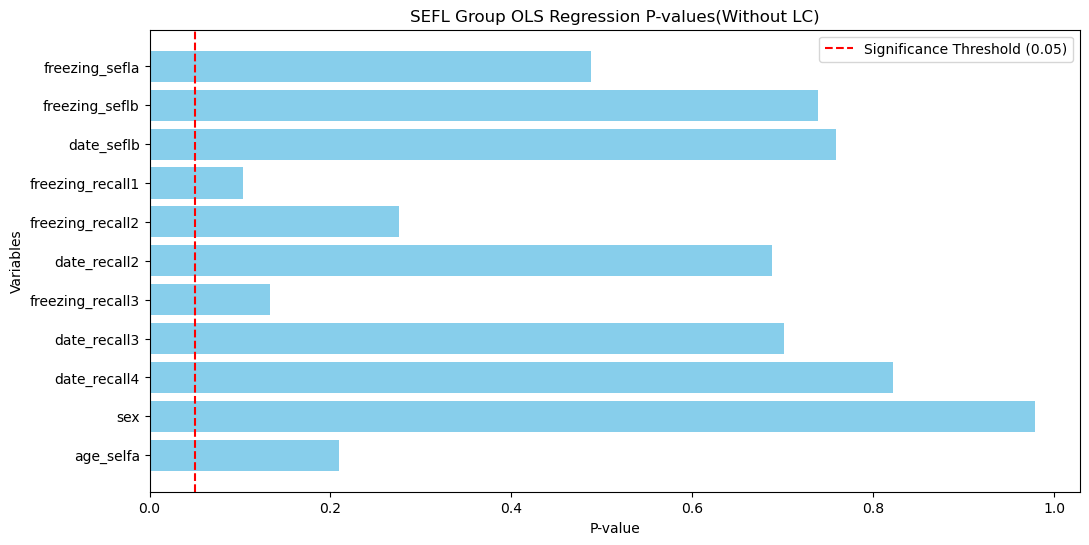

In [80]:
## extract the p_value of each model
p_values = model.pvalues
p_values = p_values.to_frame().reset_index()
p_values.columns = ['feature', 'p_value']
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(p_values['feature'], p_values['p_value'], color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('P-value')
plt.ylabel('Variables')
plt.title('SEFL Group OLS Regression P-values(Without LC)')
plt.gca().invert_yaxis() 
plt.legend()
plt.show()

In [81]:
# Initialize an empty list to store MSE values and their corresponding identifiers
mse_list = []

mse_sefl_without_test = sm.tools.eval_measures.mse(y_test, y_test_pred)

# Dictionary for the first model's MSE and identifiers
mse_sefl_without = {
    'name': 'SEFL_WITHOUT',  # Model or group name
    'method': 'OLS',       # Method used
    'mse': mse_sefl_without_test  # Calculated MSE
}

# Append this dictionary to the list
mse_list.append(mse_sefl_without)

In [82]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import numpy as np

# Fit OLS model
ols_model = OLS(y_train, sm.add_constant(X_train)).fit()

# Get OLS predictions for the test set
y_pred_ols = ols_model.predict(sm.add_constant(X_test))

# Get standard errors of predictions
pred_stderr = ols_model.get_prediction(sm.add_constant(X_test)).se_obs

# Calculate the 95% confidence interval for the predictions
ci_lower = y_pred_ols - 1.96 * pred_stderr
ci_upper = y_pred_ols + 1.96 * pred_stderr

# Checking how many of the actual test values fall within the 95% confidence interval
inside_ci = np.sum((y_test >= ci_lower) & (y_test <= ci_upper))
percentage_inside_ci = (inside_ci / len(y_test)) * 100

percentage_inside_ci

100.0

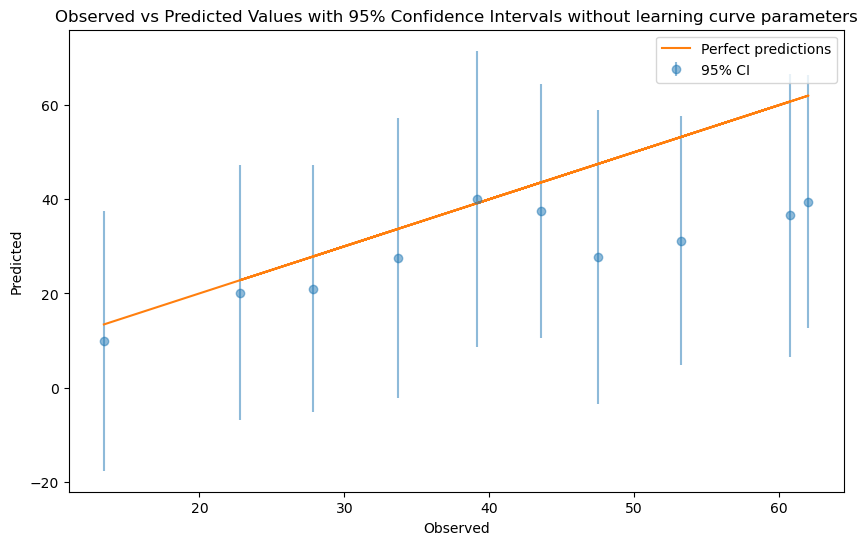

In [83]:
# Visualize the outcomes
plt.figure(figsize=(10, 6))

# Plot the observed vs predicted values with confidence intervals
plt.errorbar(y_test, y_pred_ols, yerr=1.96*pred_stderr, fmt='o', alpha=0.5, label='95% CI')

# Plot a line for perfect predictions
plt.plot(y_test, y_test, label='Perfect predictions')

# Labelling
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values with 95% Confidence Intervals without learning curve parameters')
plt.legend()
plt.show()

### Machine Learning Methods

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}


model_mse = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mean_score = -np.mean(scores)
    model_mse[model_name] = mean_score

model_mse

{'Decision Tree Regressor': 310.9481815555556,
 'Random Forest Regressor': 171.73405558504447,
 'Gradient Boosting Regressor': 213.6947616737672}

In [85]:
model_importances = {}
mse_details = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features_importance = dict(zip(X.columns, importances))
        sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
        model_importances[model_name] = sorted_importances
    else:
        model_importances[model_name] = "This model doesn't support feature importance."
        # Append to mse_list with the specified structure
    mse_entry = {
        'name': "SEFL_WITHOUT",  # Combine "SEFL_WITHOUT" with the model name
        'method': model_name,  # You might adjust this as needed
        'mse': test_mse
    }
    mse_list.append(mse_entry)


    mse_details[model_name] = {"Train MSE": train_mse, "Test MSE": test_mse}

for model_name, importances in model_importances.items():
    mse_info = mse_details[model_name]
    print(f"{model_name} MSE:")
    print(f"Train MSE: {mse_info['Train MSE']}")
    print(f"Test MSE: {mse_info['Test MSE']}\n")
    print(f"{model_name} feature importances:")
    for feature, importance in importances:
        print(f"{feature}: {importance}")
    print("\n")

Decision Tree Regressor MSE:
Train MSE: 0.0
Test MSE: 254.8308600000001

Decision Tree Regressor feature importances:
freezing_recall1: 0.3559523592245663
freezing_sefla: 0.1717616581040354
freezing_recall3: 0.1681432908484321
freezing_seflb: 0.10090385180780585
date_recall4: 0.09749778320709677
freezing_recall2: 0.09423379903867761
date_recall3: 0.011355392857193026
sex: 0.00015186491219287764
date_seflb: 0.0
date_recall2: 0.0
age_selfa: 0.0


Random Forest Regressor MSE:
Train MSE: 23.080703991388837
Test MSE: 279.01789575600037

Random Forest Regressor feature importances:
freezing_recall3: 0.256249995036368
freezing_sefla: 0.25315149254725683
freezing_recall1: 0.23661622992283127
freezing_seflb: 0.08900411567036111
freezing_recall2: 0.08486387137969423
date_recall4: 0.03271545535419951
age_selfa: 0.02939068543349579
date_recall2: 0.008365935133948697
sex: 0.00533055859023566
date_recall3: 0.004311660931609025
date_seflb: 0.0


Gradient Boosting Regressor MSE:
Train MSE: 0.072709075

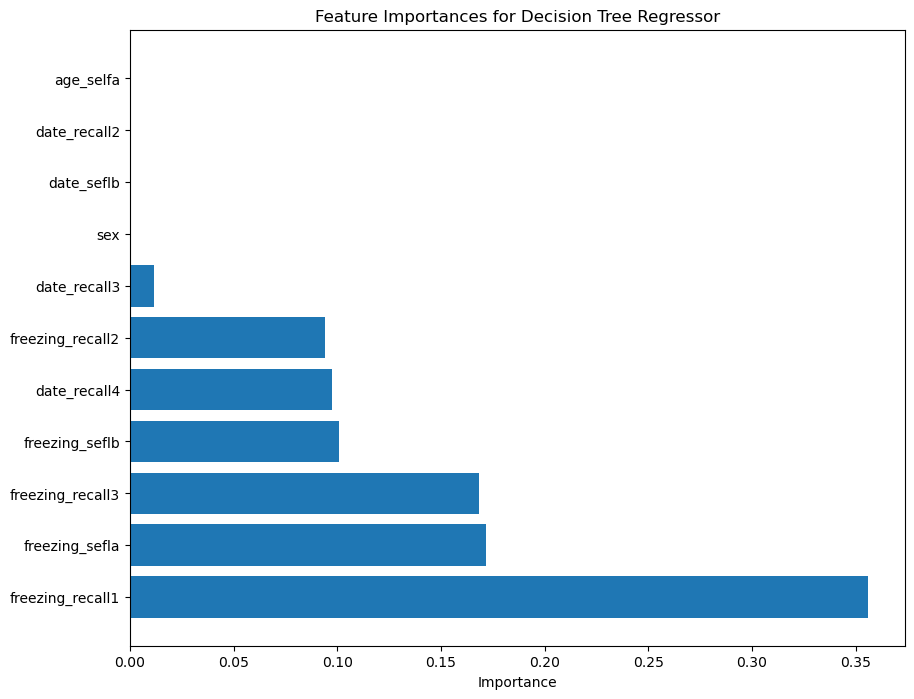

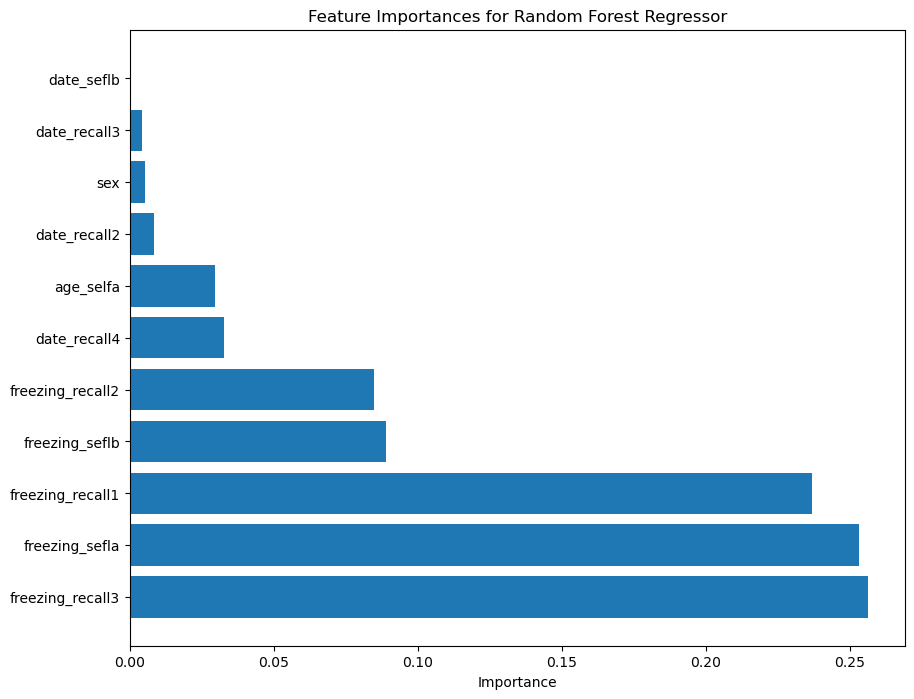

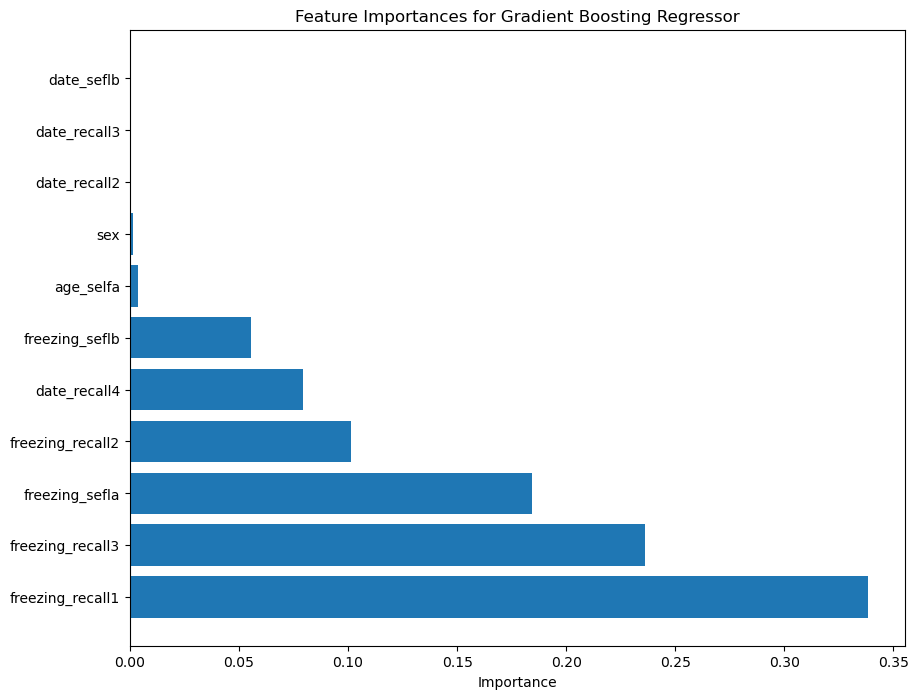

In [86]:
# Assuming model_importances is populated as per your code
for model_name, importances in model_importances.items():
    # Check if the model supports feature importances
    if isinstance(importances, str):
        print(f"{model_name} does not support feature importance.")
        continue

    # Unpacking the features and their importances
    features, importances = zip(*importances)

    # Creating the plot
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(importances)), importances, align='center')
    plt.yticks(range(len(importances)), features)
    plt.xlabel('Importance')
    plt.title(f'Feature Importances for {model_name}')

    plt.show()

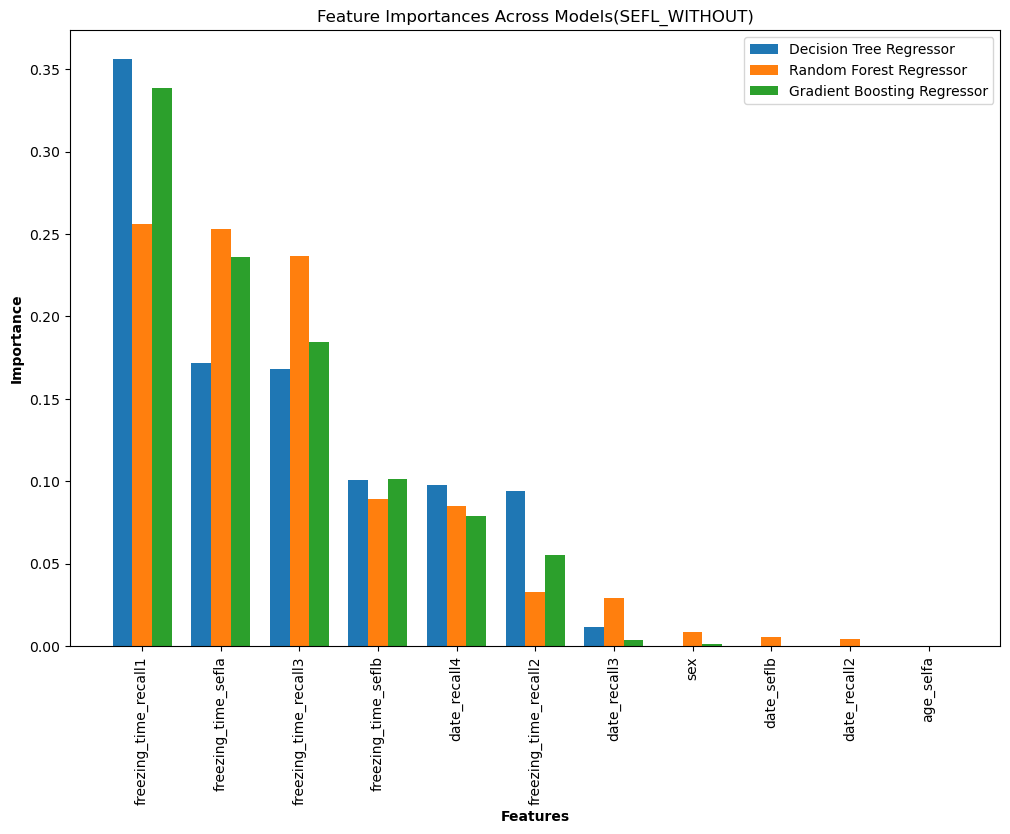

In [87]:
# Filter out models that don't support feature importance
valid_importances = {model: features for model, features in model_importances.items() if not isinstance(features, str)}

# Assuming all models have the same number and order of features, which should be ensured beforehand
feature_names = [feature for feature, _ in next(iter(valid_importances.values()))]
feature_names = [name.replace('freezing_', 'freezing_time_') for name in feature_names]
# Number of models and features
n_models = len(valid_importances)
n_features = len(feature_names)

# Creating a bar width and positions
barWidth = 1 / (n_models + 1)
positions = np.arange(n_features)

# Create figure and axis
plt.figure(figsize=(12, 8))

for i, (model_name, importances) in enumerate(valid_importances.items()):
    # Assuming the order of features is consistent across models, extract just the importances
    feature_importances = [importance for _, importance in importances]
    # Calculate position for each bar
    barPositions = [x + (i * barWidth) for x in positions]

    # Plot
    plt.bar(barPositions, feature_importances, width=barWidth, label=model_name)

# Adding labels and title
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Feature Importances Across Models(SEFL_WITHOUT)')

# Adding ticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(n_features)], feature_names, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.show()

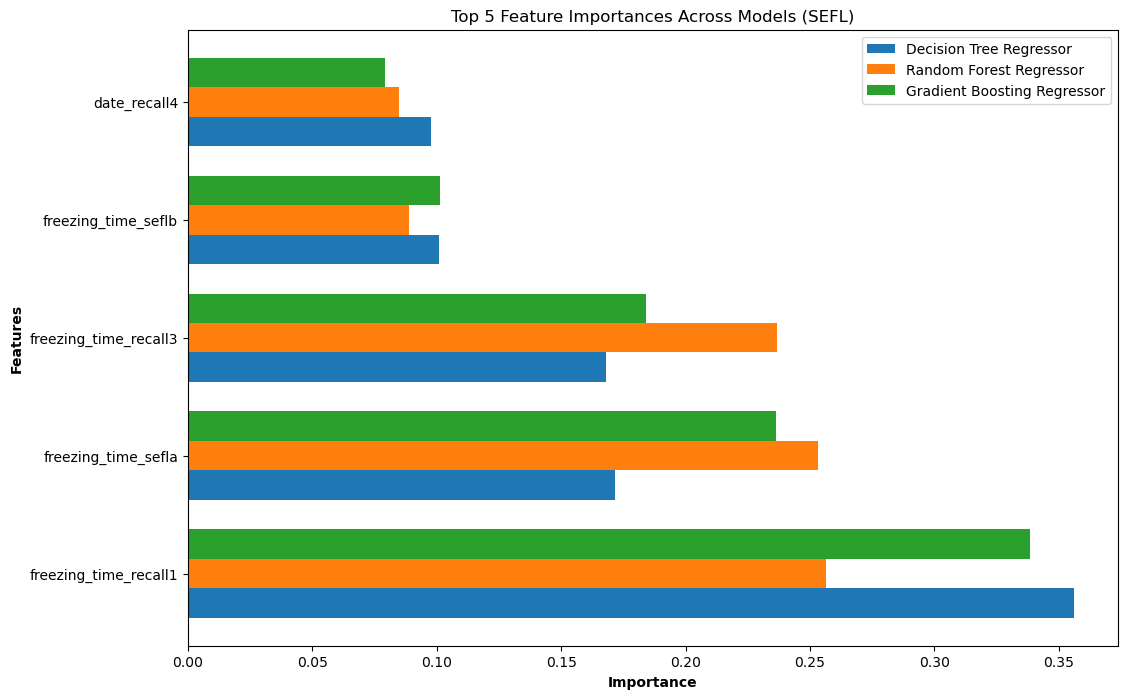

In [88]:
# Determine the top 5 features based on the average importance across all models
average_importances = np.zeros(n_features)
for importances in valid_importances.values():
    average_importances += np.array([importance for _, importance in importances])
average_importances /= n_models

top_indices = np.argsort(average_importances)[-5:][::-1]
top_feature_names = [feature_names[i] for i in top_indices]

# Creating a bar width and positions
barWidth = 1 / (n_models + 1)
positions = np.arange(5)

# Create figure and axis
plt.figure(figsize=(12, 8))

for i, (model_name, importances) in enumerate(valid_importances.items()):
    # Assuming the order of features is consistent across models, extract just the importances
    feature_importances = [importance for _, importance in importances]
    # Extract the top 5 feature importances
    top_feature_importances = [feature_importances[i] for i in top_indices]
    # Calculate position for each bar
    barPositions = [x + (i * barWidth) for x in positions]

    # Plot
    plt.barh(barPositions, top_feature_importances, height=barWidth, label=model_name)

# Adding labels and title
plt.ylabel('Features', fontweight='bold')
plt.xlabel('Importance', fontweight='bold')
plt.title('Top 5 Feature Importances Across Models (SEFL)')

# Adding ticks on the middle of the group bars
plt.yticks([r + barWidth for r in range(5)], top_feature_names)

# Create legend & Show graphic
plt.legend()
plt.show()

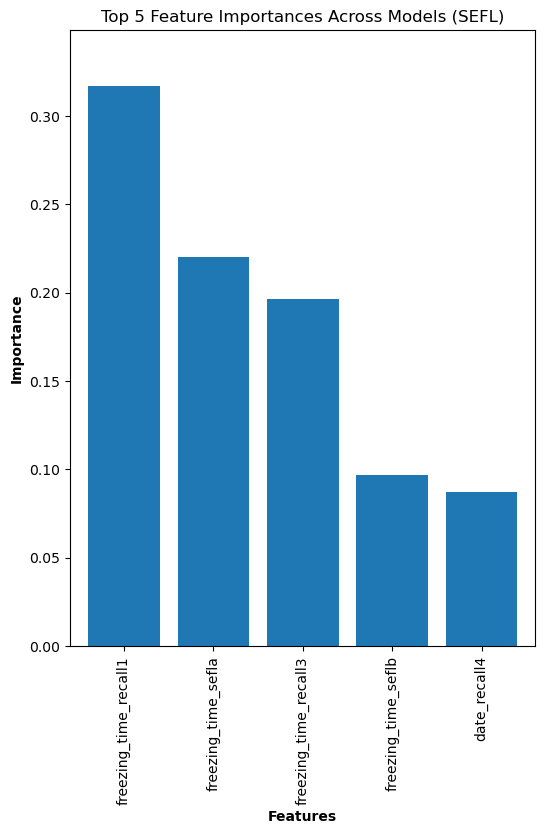

In [89]:
# 计算所有模型的平均重要性
n_features = len(feature_names)
average_importances = np.zeros(n_features)
for importances in valid_importances.values():
    average_importances += np.array([importance for _, importance in importances])
average_importances /= len(valid_importances)

# 确定前5个特征
top_indices = np.argsort(average_importances)[-5:][::-1]
top_feature_names = [feature_names[i] for i in top_indices]
top_average_importances = average_importances[top_indices]

# 创建图形和轴
plt.figure(figsize=(6, 8))

# 绘制前5个特征的平均重要性
barWidth = 0.4
positions = np.arange(len(top_feature_names))*0.5

plt.bar(positions, top_average_importances, width=barWidth)

# 添加标签和标题
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Top 5 Feature Importances Across Models (SEFL)')
# 添加刻度标签
plt.xticks(positions, top_feature_names, rotation=90)

# 设置xlim和ylim
plt.xlim(-0.3, len(top_feature_names) - 2.7)
plt.ylim(0, max(top_average_importances) * 1.1)

# 显示图形
plt.show()


In [ ]:
# Training the RandomForestRegressor with the actual dataset provided by the user
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting the target variable for the test set using the random forest
y_pred_rf = rf.predict(X_test)

# Initialize the list to store prediction intervals
y_pred_intervals_rf = []

# Calculate the prediction interval for each test example
for i in range(len(X_test)):
    # Get the predictions from each tree
    predictions = [tree.predict(X_test.iloc[i].values.reshape(1, -1)) for tree in rf.estimators_]

    # Calculate the 2.5th and 97.5th percentiles for the predictions
    lower_bound = np.percentile(predictions, 2.5)
    upper_bound = np.percentile(predictions, 97.5)
    y_pred_intervals_rf.append((lower_bound, upper_bound))

# Convert prediction intervals to a numpy array for easier manipulation
y_pred_intervals_rf = np.array(y_pred_intervals_rf)

# Calculate the percentage of test set targets that fall within the prediction intervals
within_interval = np.sum((y_test >= y_pred_intervals_rf[:, 0]) & (y_test <= y_pred_intervals_rf[:, 1]))
interval_coverage = within_interval / len(y_test) * 100

interval_coverage

70.0

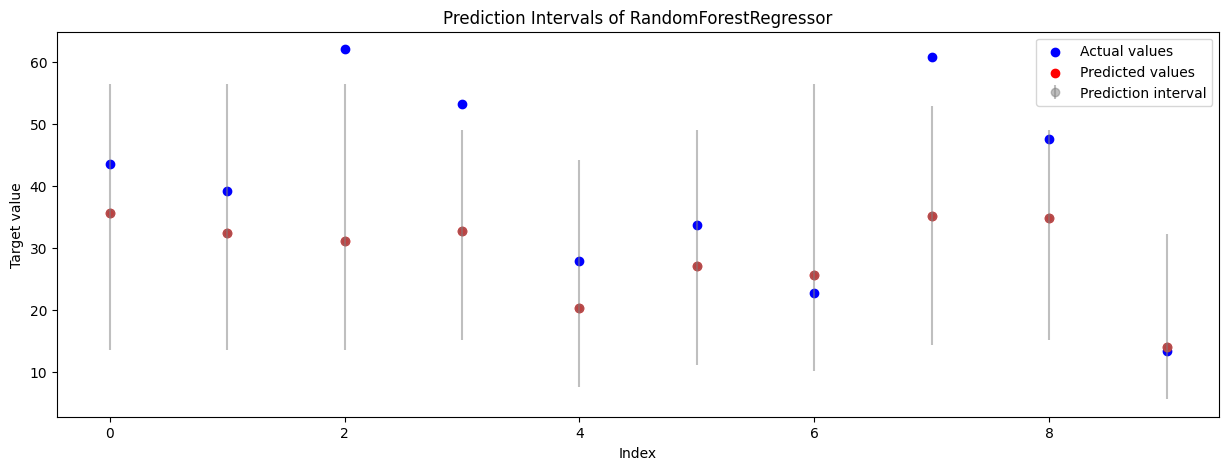

In [ ]:
# Plot the predicted values and the prediction intervals
plt.figure(figsize=(15, 5))

# Index for x-axis
index = np.arange(len(y_test))

# Plotting the actual values
plt.scatter(index, y_test, color='blue', label='Actual values')

# Plotting the predicted values
plt.scatter(index, y_pred_rf, color='red', label='Predicted values')

# Plotting the prediction intervals
plt.errorbar(index, y_pred_rf, yerr=[y_pred_rf - y_pred_intervals_rf[:, 0], y_pred_intervals_rf[:, 1] - y_pred_rf],
             fmt='o', color='gray', alpha=0.5, label='Prediction interval')

plt.title('Prediction Intervals of RandomForestRegressor')
plt.xlabel('Index')
plt.ylabel('Target value')
plt.legend()

## Training with learning curve(mean)


### Wrangling

In [ ]:
df_lc = pd.read_csv('stim_interval_freezing.csv')
df_lc = df_lc.dropna(axis=0)

In [ ]:
df_lc['cohort_id'] = df_lc['Cohort'] + '_' + df_lc['id']

# Calculate the mean of Shock01 to Shock10 for each row
shock_columns = [f'Shock0{i}' if i < 10 else f'Shock{i}' for i in range(1, 11)]
df_lc['mean_shock'] = df_lc[shock_columns].mean(axis=1)

# Display the first few rows of the updated dataframe to verify the changes
df_mean_lc = df_lc[['cohort_id', 'mean_shock']]

In [ ]:
test_mean_lc = test_1_sefl.merge(df_mean_lc, on='cohort_id', how='inner')

### OLS

In [ ]:
X = test_mean_lc.drop(columns = ['cohort_id','date_recall1','freezing_recall4'])
y = test_mean_lc['freezing_recall4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Adding a constant to the X_train and X_test for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Creating the model
ols_model = sm.OLS(y_train, X_train_sm)

# Fitting the model
ols_results = ols_model.fit()

# Calculate MSE for training data
y_train_pred = ols_results.predict(X_train_sm)
mse_train = sm.tools.eval_measures.mse(y_train, y_train_pred)

# Calculate MSE for test data
y_test_pred = ols_results.predict(X_test_sm)
mse_test = sm.tools.eval_measures.mse(y_test, y_test_pred)

# Getting a summary of the model
ols_summary = ols_results.summary()
ols_summary, mse_train, mse_test

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       freezing_recall4   R-squared:                       0.605
 Model:                            OLS   Adj. R-squared:                  0.424
 Method:                 Least Squares   F-statistic:                     3.342
 Date:                Tue, 23 Jul 2024   Prob (F-statistic):            0.00650
 Time:                        12:55:57   Log-Likelihood:                -128.05
 No. Observations:                  36   AIC:                             280.1
 Df Residuals:                      24   BIC:                             299.1
 Df Model:                          11                                         
 Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------

In [ ]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import numpy as np

# Fit OLS model
ols_model = OLS(y_train, sm.add_constant(X_train)).fit()

# Get OLS predictions for the test set
y_pred_ols = ols_model.predict(sm.add_constant(X_test))

# Get standard errors of predictions
pred_stderr = ols_model.get_prediction(sm.add_constant(X_test)).se_obs

# Calculate the 95% confidence interval for the predictions
ci_lower = y_pred_ols - 1.96 * pred_stderr
ci_upper = y_pred_ols + 1.96 * pred_stderr

# Checking how many of the actual test values fall within the 95% confidence interval
inside_ci = np.sum((y_test >= ci_lower) & (y_test <= ci_upper))
percentage_inside_ci = (inside_ci / len(y_test)) * 100

percentage_inside_ci

55.55555555555556

### Machine Learning Methods

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}


model_mse = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mean_score = -np.mean(scores)
    model_mse[model_name] = mean_score

model_mse

{'Decision Tree Regressor': 256.6416711111111,
 'Random Forest Regressor': 173.2180018122223,
 'Gradient Boosting Regressor': 215.31584319586892}

In [ ]:
model_importances = {}
mse_details = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features_importance = dict(zip(X.columns, importances))
        sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
        model_importances[model_name] = sorted_importances
    else:
        model_importances[model_name] = "This model doesn't support feature importance."

    mse_details[model_name] = {"Train MSE": train_mse, "Test MSE": test_mse}

for model_name, importances in model_importances.items():
    mse_info = mse_details[model_name]
    print(f"{model_name} MSE:")
    print(f"Train MSE: {mse_info['Train MSE']}")
    print(f"Test MSE: {mse_info['Test MSE']}\n")
    print(f"{model_name} feature importances:")
    for feature, importance in importances:
        print(f"{feature}: {importance}")
    print("\n")

Decision Tree Regressor MSE:
Train MSE: 0.0
Test MSE: 338.0270555555556

Decision Tree Regressor feature importances:
freezing_recall3: 0.7205365630480325
date_recall3: 0.12623524041850656
mean_shock: 0.046876432415272194
freezing_recall2: 0.044143988734085884
freezing_seflb: 0.02970141759368515
freezing_recall1: 0.025213878676224145
date_recall4: 0.003984779658704028
freezing_sefla: 0.002896818054985507
age_selfa: 0.00028986577465994534
sex: 0.00011698304215466274
date_recall2: 4.032583689351641e-06
date_seflb: 0.0


Random Forest Regressor MSE:
Train MSE: 20.664518322777656
Test MSE: 378.58236812444414

Random Forest Regressor feature importances:
freezing_recall3: 0.42293889256107164
freezing_sefla: 0.14216460489050017
freezing_seflb: 0.1220466416973518
freezing_recall1: 0.088315576649402
freezing_recall2: 0.06773140025959777
mean_shock: 0.05572738845761483
date_recall4: 0.0381628055310248
date_recall3: 0.0310485821494185
date_recall2: 0.022156150249350953
sex: 0.005609659153139605


In [ ]:
# Training the RandomForestRegressor with the actual dataset provided by the user
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting the target variable for the test set using the random forest
y_pred_rf = rf.predict(X_test)

# Initialize the list to store prediction intervals
y_pred_intervals_rf = []

# Calculate the prediction interval for each test example
for i in range(len(X_test)):
    # Get the predictions from each tree
    predictions = [tree.predict(X_test.iloc[i].values.reshape(1, -1)) for tree in rf.estimators_]

    # Calculate the 2.5th and 97.5th percentiles for the predictions
    lower_bound = np.percentile(predictions, 2.5)
    upper_bound = np.percentile(predictions, 97.5)
    y_pred_intervals_rf.append((lower_bound, upper_bound))

# Convert prediction intervals to a numpy array for easier manipulation
y_pred_intervals_rf = np.array(y_pred_intervals_rf)

# Calculate the percentage of test set targets that fall within the prediction intervals
within_interval = np.sum((y_test >= y_pred_intervals_rf[:, 0]) & (y_test <= y_pred_intervals_rf[:, 1]))
interval_coverage = within_interval / len(y_test) * 100

interval_coverage

66.66666666666666

##Training with learning curve, every columns of it

In [ ]:
df_all_lc = df_lc[['cohort_id']+shock_columns]
test_all_lc = test_1_sefl.merge(df_all_lc, on='cohort_id', how='inner')

In [ ]:
test_all_lc.to_csv('/content/drive/My Drive/PTSD /test_all_lc.csv', index=False)

OSError: Cannot save file into a non-existent directory: '\content\drive\My Drive\PTSD '

In [ ]:
X = test_all_lc.drop(columns = ['cohort_id','date_recall1','freezing_recall4'])
y = test_all_lc['freezing_recall4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OLS

In [ ]:
# Adding a constant to the X_train and X_test for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Creating the model
ols_model = sm.OLS(y_train, X_train_sm)

# Fitting the model
ols_results = ols_model.fit()

# Calculate MSE for training data
y_train_pred = ols_results.predict(X_train_sm)
mse_train = sm.tools.eval_measures.mse(y_train, y_train_pred)

# Calculate MSE for test data
y_test_pred = ols_results.predict(X_test_sm)
mse_test = sm.tools.eval_measures.mse(y_test, y_test_pred)

# Getting a summary of the model
ols_summary = ols_results.summary()
ols_summary, mse_train, mse_test

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       freezing_recall4   R-squared:                       0.836
 Model:                            OLS   Adj. R-squared:                  0.617
 Method:                 Least Squares   F-statistic:                     3.819
 Date:                Tue, 23 Jul 2024   Prob (F-statistic):            0.00543
 Time:                        12:56:40   Log-Likelihood:                -112.25
 No. Observations:                  36   AIC:                             266.5
 Df Residuals:                      15   BIC:                             299.7
 Df Model:                          20                                         
 Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------

In [ ]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import numpy as np

# Fit OLS model
ols_model = OLS(y_train, sm.add_constant(X_train)).fit()

# Get OLS predictions for the test set
y_pred_ols = ols_model.predict(sm.add_constant(X_test))

# Get standard errors of predictions
pred_stderr = ols_model.get_prediction(sm.add_constant(X_test)).se_obs

# Calculate the 95% confidence interval for the predictions
ci_lower = y_pred_ols - 1.96 * pred_stderr
ci_upper = y_pred_ols + 1.96 * pred_stderr

# Checking how many of the actual test values fall within the 95% confidence interval
inside_ci = np.sum((y_test >= ci_lower) & (y_test <= ci_upper))
percentage_inside_ci = (inside_ci / len(y_test)) * 100

percentage_inside_ci

66.66666666666666

### Machine Learning Methods

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}


model_mse = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mean_score = -np.mean(scores)
    model_mse[model_name] = mean_score

model_mse

{'Decision Tree Regressor': 283.40413333333333,
 'Random Forest Regressor': 162.89432513288884,
 'Gradient Boosting Regressor': 218.9844400121789}

In [ ]:
model_importances = {}
mse_details = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features_importance = dict(zip(X.columns, importances))
        sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
        model_importances[model_name] = sorted_importances
    else:
        model_importances[model_name] = "This model doesn't support feature importance."

    mse_details[model_name] = {"Train MSE": train_mse, "Test MSE": test_mse}

for model_name, importances in model_importances.items():
    mse_info = mse_details[model_name]
    print(f"{model_name} MSE:")
    print(f"Train MSE: {mse_info['Train MSE']}")
    print(f"Test MSE: {mse_info['Test MSE']}\n")
    print(f"{model_name} feature importances:")
    for feature, importance in importances:
        print(f"{feature}: {importance}")
    print("\n")

Decision Tree Regressor MSE:
Train MSE: 0.0
Test MSE: 439.41985555555556

Decision Tree Regressor feature importances:
freezing_recall3: 0.4456889410994325
Shock04: 0.13709303498337935
Shock02: 0.13550307533505435
freezing_recall1: 0.08283376896776867
Shock10: 0.05588277375458284
freezing_seflb: 0.02754180825456538
date_recall2: 0.027080711428435884
Shock05: 0.024378277870744685
freezing_recall2: 0.017938642351191154
date_recall4: 0.01714406836271026
freezing_sefla: 0.014006715203028229
Shock01: 0.005618603682569067
Shock03: 0.003680178564059189
Shock06: 0.0023735375952981816
Shock07: 0.0017332995035618224
Shock09: 0.0014795033731820047
sex: 2.305967043646781e-05
date_seflb: 0.0
date_recall3: 0.0
age_selfa: 0.0
Shock08: 0.0


Random Forest Regressor MSE:
Train MSE: 17.98805451722212
Test MSE: 313.5793511033329

Random Forest Regressor feature importances:
freezing_recall3: 0.30141091086122723
Shock03: 0.10920798962236593
Shock02: 0.10357482384290952
freezing_recall1: 0.0871347471329402

In [ ]:
# Training the RandomForestRegressor with the actual dataset provided by the user
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting the target variable for the test set using the random forest
y_pred_rf = rf.predict(X_test)

# Initialize the list to store prediction intervals
y_pred_intervals_rf = []

# Calculate the prediction interval for each test example
for i in range(len(X_test)):
    # Get the predictions from each tree
    predictions = [tree.predict(X_test.iloc[i].values.reshape(1, -1)) for tree in rf.estimators_]

    # Calculate the 2.5th and 97.5th percentiles for the predictions
    lower_bound = np.percentile(predictions, 2.5)
    upper_bound = np.percentile(predictions, 97.5)
    y_pred_intervals_rf.append((lower_bound, upper_bound))

# Convert prediction intervals to a numpy array for easier manipulation
y_pred_intervals_rf = np.array(y_pred_intervals_rf)

# Calculate the percentage of test set targets that fall within the prediction intervals
within_interval = np.sum((y_test >= y_pred_intervals_rf[:, 0]) & (y_test <= y_pred_intervals_rf[:, 1]))
interval_coverage = within_interval / len(y_test) * 100

interval_coverage

77.77777777777779

## Training with learning curve parameters

In [ ]:
from sklearn.linear_model import LinearRegression

# Preparing the independent variable (1 to 10)
X_lc = np.array(range(1, 11)).reshape(-1, 1)

# Placeholder for calculated beta_1 values
beta_1_values = []

# Loop through each row to calculate beta_1 for Shock01 to Shock10
for index, row in test_all_lc.iterrows():
    y = row[['Shock01', 'Shock02', 'Shock03', 'Shock04', 'Shock05',
             'Shock06', 'Shock07', 'Shock08', 'Shock09', 'Shock10']].values.reshape(-1, 1)
    model = LinearRegression().fit(X_lc, y)
    beta_1 = model.coef_[0][0]  # Extracting beta_1 (slope)
    beta_1_values.append(beta_1)

# Adding the beta_1 values as a new column to the dataframe
test_all_lc['beta_1'] = beta_1_values

# Dropping the original Shock columns
test_all_lc_para = test_all_lc.drop(columns=['Shock01', 'Shock02', 'Shock03', 'Shock04', 'Shock05',
                                  'Shock06', 'Shock07', 'Shock08', 'Shock09', 'Shock10'])


In [ ]:
# Prepare the independent variables (X) by dropping the dependent variable and the identifier
X = test_all_lc_para.drop(columns=['cohort_id', 'freezing_recall4'])
# Adding a constant for the intercept
X = sm.add_constant(X)

# Prepare the dependent variable (y)
y = test_all_lc_para['freezing_recall4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OLS

In [ ]:
# Perform OLS regression
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       freezing_recall4   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3.543
Date:                Tue, 23 Jul 2024   Prob (F-statistic):            0.00208
Time:                        12:57:10   Log-Likelihood:                -167.64
No. Observations:                  45   AIC:                             361.3
Df Residuals:                      32   BIC:                             384.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
freezing_sefla       0.4885      0.208      2.353      0.025       0.066       0.911
freezing_seflb      -0.0601      0.219     -0.275      0.785      -0.506       0.386
date_seflb           1.4782     16.862      0.088      0.931     -32.868      35.824
freezing_recall1     0.2994      0.141      2.119      0.042       0.012       0.587
date_recall1         4.0018      8.109      0.494      0.625     -12.515      20.519
freezing_recall2    -0.1627      0.227     -0.717      0.478      -0.625       0.299
date_recall2        -5.6386     12.404     -0.455      0.652     -30.904      19.627
freezing_recall3     0.2830      0.253      1.120      0.271      -0.232       0.798
date_recall3         0.4397      2.717      0.162      0.872      -5.095       5.974
date_recall4         1.1314      2.298      0.492      0.626      -3.549       5.811
sex                -11.0763     17.515     -0.632      0.532     -46.753      24.600
age_selfa           11.0441     10.112      1.092      0.283      -9.554      31.642
beta_1              -2.1343      1.235     -1.728      0.094      -4.650       0.382
==============================================================================
Omnibus:                        0.897   Durbin-Watson:                   2.464
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.820
Skew:                          -0.020   Prob(JB):                        0.664
Kurtosis:                       2.340   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

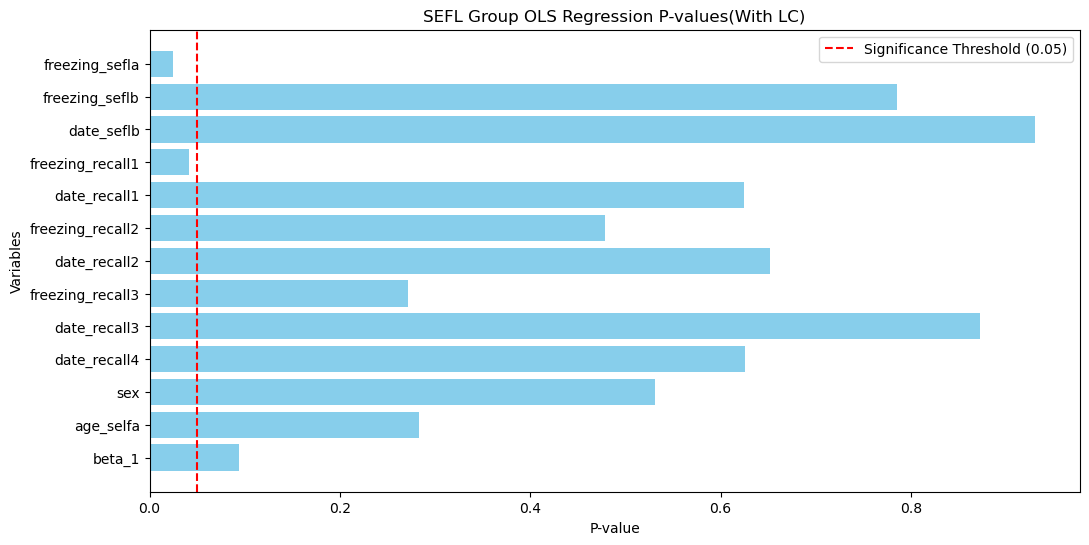

In [ ]:
## extract the p_value of each model
p_values = model.pvalues
p_values = p_values.to_frame().reset_index()
p_values.columns = ['feature', 'p_value']
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(p_values['feature'], p_values['p_value'], color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('P-value')
plt.ylabel('Variables')
plt.title('SEFL Group OLS Regression P-values(With LC)')
plt.gca().invert_yaxis() 
plt.legend()
plt.show()

In [ ]:
# Fit OLS model
ols_model = OLS(y_train, sm.add_constant(X_train)).fit()

# Get OLS predictions for the test set
y_pred_ols = ols_model.predict(sm.add_constant(X_test))

# Get standard errors of predictions
pred_stderr = ols_model.get_prediction(sm.add_constant(X_test)).se_obs

# Calculate the 95% confidence interval for the predictions
ci_lower = y_pred_ols - 1.96 * pred_stderr
ci_upper = y_pred_ols + 1.96 * pred_stderr

# Checking how many of the actual test values fall within the 95% confidence interval
inside_ci = np.sum((y_test >= ci_lower) & (y_test <= ci_upper))
percentage_inside_ci = (inside_ci / len(y_test)) * 100

percentage_inside_ci

66.66666666666666

In [ ]:
mse_sefl_with_test = sm.tools.eval_measures.mse(y_test, y_pred_ols)

# Dictionary for the first model's MSE and identifiers
mse_sefl_with = {
    'name': 'SEFL_WITH_PARA',  # Model or group name
    'method': 'OLS',       # Method used
    'mse': mse_sefl_with_test  # Calculated MSE
}

# Append this dictionary to the list
mse_list.append(mse_sefl_with)

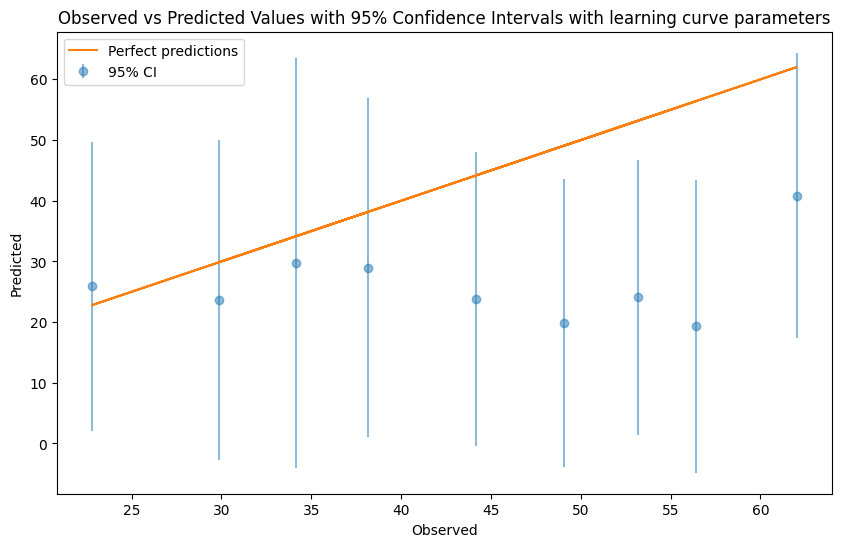

In [ ]:
# Visualize the outcomes
plt.figure(figsize=(10, 6))

# Plot the observed vs predicted values with confidence intervals
plt.errorbar(y_test, y_pred_ols, yerr=1.96*pred_stderr, fmt='o', alpha=0.5, label='95% CI')

# Plot a line for perfect predictions
plt.plot(y_test, y_test, label='Perfect predictions')

# Labelling
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values with 95% Confidence Intervals with learning curve parameters')
plt.legend()
plt.show()

### Machine Learning Methods

In [ ]:
# Re-defining the models dictionary
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Re-running the evaluation for each model
model_mse = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mean_score = -np.mean(scores)
    model_mse[model_name] = mean_score

model_importances = {}
mse_details = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features_importance = dict(zip(X.columns, importances))
        sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
        model_importances[model_name] = sorted_importances
    else:
        model_importances[model_name] = "This model doesn't support feature importance."

    mse_details[model_name] = {"Train MSE": train_mse, "Test MSE": test_mse}
    # Append to mse_list with the specified structure
    mse_entry = {
        'name': f"SEFL_WITH_PARA",  # Combine "SEFL_WITHOUT" with the model name
        'method': model_name,  # You might adjust this as needed
        'mse': test_mse
    }
    mse_list.append(mse_entry)

model_mse, model_importances, mse_details

({'Decision Tree Regressor': 272.46508,
  'Random Forest Regressor': 171.6649960395555,
  'Gradient Boosting Regressor': 210.18891733334036},
 {'Decision Tree Regressor': [('freezing_recall3', 0.7060509430847722),
   ('date_recall4', 0.12901202875972978),
   ('freezing_sefla', 0.0646286865630647),
   ('beta_1', 0.033073185580134334),
   ('freezing_seflb', 0.031039750553807918),
   ('freezing_recall2', 0.02244955293608848),
   ('freezing_recall1', 0.012575191190416881),
   ('date_recall1', 0.0011476016615491389),
   ('sex', 2.3059670436467807e-05),
   ('date_seflb', 0.0),
   ('date_recall2', 0.0),
   ('date_recall3', 0.0),
   ('age_selfa', 0.0)],
  'Random Forest Regressor': [('freezing_recall3', 0.4347307430627006),
   ('freezing_sefla', 0.16059776396536016),
   ('freezing_seflb', 0.09553484987537986),
   ('freezing_recall1', 0.0909478050670407),
   ('freezing_recall2', 0.08613692085734959),
   ('beta_1', 0.06081254097845889),
   ('date_recall3', 0.021478954304252465),
   ('date_recall

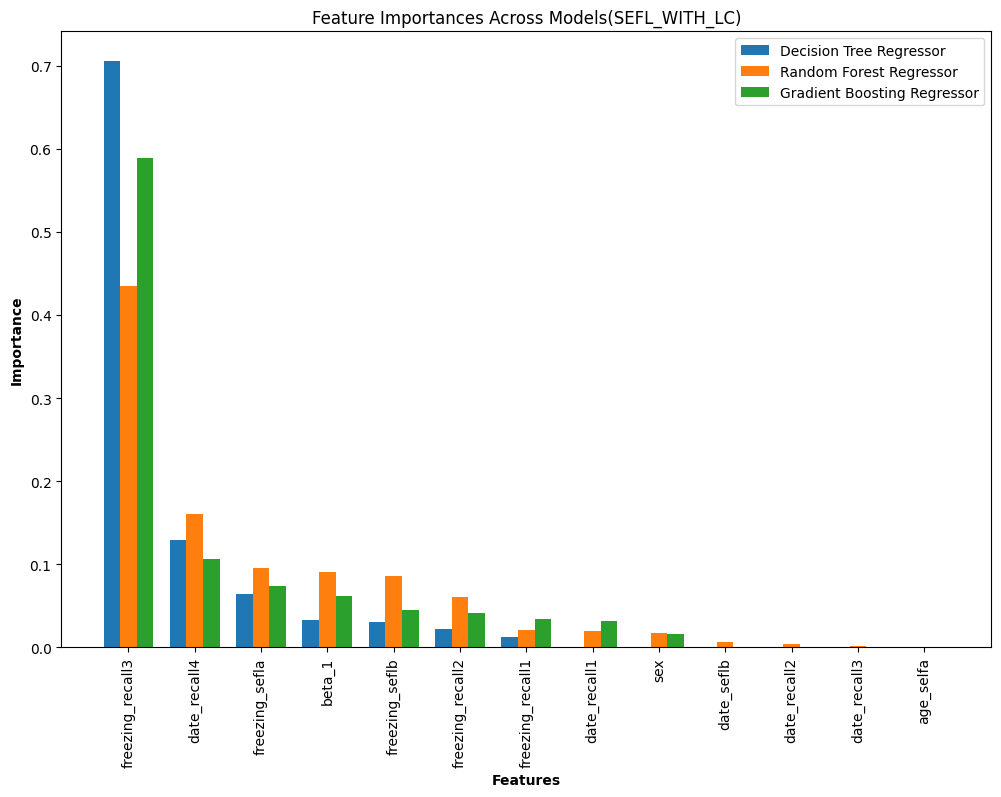

In [ ]:
# Filter out models that don't support feature importance
valid_importances = {model: features for model, features in model_importances.items() if not isinstance(features, str)}

# Assuming all models have the same number and order of features, which should be ensured beforehand
feature_names = [feature for feature, _ in next(iter(valid_importances.values()))]

# Number of models and features
n_models = len(valid_importances)
n_features = len(feature_names)

# Creating a bar width and positions
barWidth = 1 / (n_models + 1)
positions = np.arange(n_features)

# Create figure and axis
plt.figure(figsize=(12, 8))

for i, (model_name, importances) in enumerate(valid_importances.items()):
    # Assuming the order of features is consistent across models, extract just the importances
    feature_importances = [importance for _, importance in importances]
    # Calculate position for each bar
    barPositions = [x + (i * barWidth) for x in positions]

    # Plot
    plt.bar(barPositions, feature_importances, width=barWidth, label=model_name)

# Adding labels and title
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Feature Importances Across Models(SEFL_WITH_LC)')

# Adding ticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(n_features)], feature_names, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
# Initialize and fit the XGBoost model with limited number of trees to avoid timeout
from xgboost import XGBRegressor
xgb_model_limited = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model_limited.fit(X, y)

# Extracting feature importances from the limited model
feature_importances_limited = xgb_model_limited.feature_importances_
features = X.columns
feature_importance_dict_limited = {feature: importance for feature, importance in zip(features, feature_importances_limited)}

# Sorting features by importance
sorted_feature_importance_limited = sorted(feature_importance_dict_limited.items(), key=lambda x: x[1], reverse=True)

sorted_feature_importance_limited

[('freezing_recall1', 0.41978925),
 ('beta_1', 0.19823001),
 ('freezing_recall3', 0.17743),
 ('freezing_recall2', 0.1132719),
 ('freezing_seflb', 0.05874062),
 ('freezing_sefla', 0.02348977),
 ('date_recall4', 0.0036633401),
 ('date_recall1', 0.0035016937),
 ('age_selfa', 0.001202144),
 ('date_recall2', 0.00035628755),
 ('sex', 0.00032493824),
 ('date_seflb', 0.0),
 ('date_recall3', 0.0)]

In [ ]:
# 初始化XGBoost回归器模型
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100)

# 训练模型
xgb_reg.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = xgb_reg.predict(X_test)

# 计算MSE
mse = mean_squared_error(y_test, y_pred)
print(f"testMSE: {mse}")

testMSE: 330.0830498891879


# Control Group


In [91]:
### test_1 is the first machine learning experiment
test_1 = data.copy()
# test_1.drop(columns=['freezing_recall5','date_recall5','dob','date_sefla','Unnamed: 0'], inplace = True)
test_1_control = test_1[test_1['condition']=='control']
test_1_control = test_1_control.drop(['condition','Unnamed: 0'], axis=1)
test_1_control['sex'] = test_1_control['sex'].replace({'male': 1, 'female': 0})
test_1_control['age_selfa'].astype(int)
test_1_control['age_selfa'] = (test_1_control['age_selfa'] > 84).astype(int)
test_1_control = test_1_control.drop(columns = ['dob','date_sefla'])

## Visualization Part

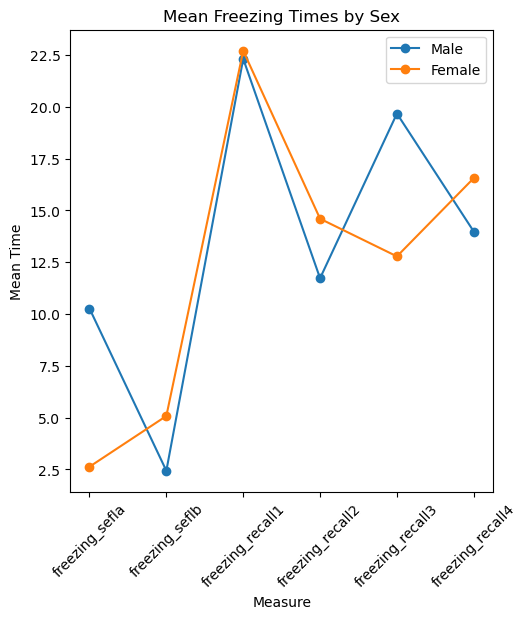

In [54]:
df = test_1_control.copy()
# Recalculating with inclusion of freezing sefla and freezing seflb
# For both sex and age groups
# Adding to the original calculation for comparison

# Recalculate means for sex categories
male_means = df[df['sex'] == 1][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()
female_means = df[df['sex'] == 0][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Sex
plt.subplot(1, 2, 2)
plt.plot(male_means.index, male_means.values, label='Male', marker='o')
plt.plot(female_means.index, female_means.values, label='Female', marker='o')
plt.title('Mean Freezing Times by Sex')
plt.xlabel('Measure')
plt.ylabel('Mean Time')
plt.xticks(rotation=45)
plt.legend()

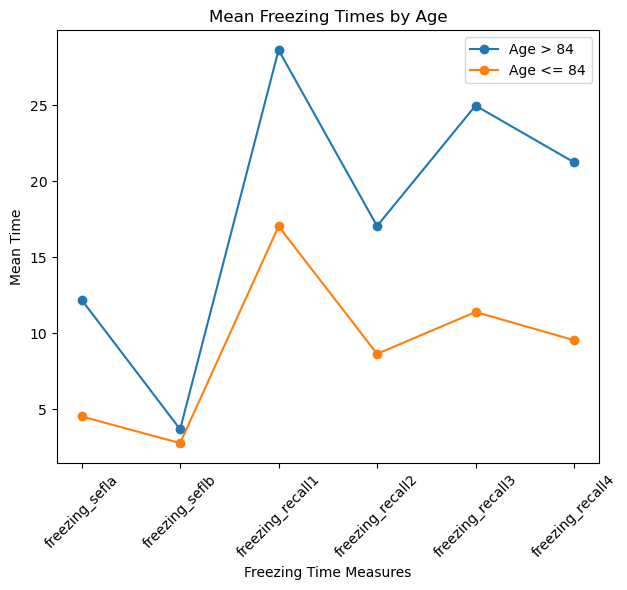

In [55]:
# Calculating mean freezing times for age above 100 and below or equal to 100
age_above_84_means = df[df['age_selfa']==1][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()
age_below_84_means = df[df['age_selfa']==0][['freezing_sefla', 'freezing_seflb', 'freezing_recall1', 'freezing_recall2', 'freezing_recall3', 'freezing_recall4']].mean()
# Plotting
plt.figure(figsize=(12, 6))
# Plot for age
plt.subplot(1, 2, 2)
plt.plot(age_above_84_means, label='Age > 84', marker='o')
plt.plot(age_below_84_means, label='Age <= 84', marker='o')
plt.title('Mean Freezing Times by Age')
plt.xlabel('Freezing Time Measures')
plt.ylabel('Mean Time')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [92]:
test_1_control = test_1_control.drop(columns = ['freezing_recall5','date_recall5'])
test_1_control.dropna(inplace=True)

## Training without learning curve

In [93]:
from sklearn.model_selection import train_test_split
X = test_1_control.drop(columns = ['cohort_id','date_recall1','freezing_recall4'])
y = test_1_control['freezing_recall4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OLS

In [59]:
import statsmodels.api as sm

# Adding a constant to the X_train and X_test for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Creating the model
ols_model = sm.OLS(y_train, X_train_sm)

# Fitting the model
ols_results = ols_model.fit()

# Calculate MSE for training data
y_train_pred = ols_results.predict(X_train_sm)
mse_train = sm.tools.eval_measures.mse(y_train, y_train_pred)

# Calculate MSE for test data
y_test_pred = ols_results.predict(X_test_sm)
mse_test = sm.tools.eval_measures.mse(y_test, y_test_pred)

# Getting a summary of the model
ols_summary = ols_results.summary()
ols_summary, mse_train, mse_test

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       freezing_recall4   R-squared:                       0.842
 Model:                            OLS   Adj. R-squared:                  0.684
 Method:                 Least Squares   F-statistic:                     5.334
 Date:                Fri, 02 Aug 2024   Prob (F-statistic):            0.00706
 Time:                        11:05:51   Log-Likelihood:                -60.606
 No. Observations:                  21   AIC:                             143.2
 Df Residuals:                      10   BIC:                             154.7
 Df Model:                          10                                         
 Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------

In [60]:
# Perform OLS regression
model = sm.OLS(y_train, X_train_sm).fit()

# Get the summary of the regression
model_summary = model.summary()

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       freezing_recall4   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     5.334
Date:                Fri, 02 Aug 2024   Prob (F-statistic):            0.00706
Time:                        11:05:56   Log-Likelihood:                -60.606
No. Observations:                  21   AIC:                             143.2
Df Residuals:                      10   BIC:                             154.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
freezing_sefla       0.3524      0.197      1.788      0.104      -0.087       0.791
freezing_seflb      -1.2194      0.578     -2.108      0.061      -2.508       0.069
date_seflb          23.8375     11.644      2.047      0.068      -2.106      49.781
freezing_recall1    -0.0066      0.214     -0.031      0.976      -0.483       0.470
freezing_recall2    -0.1418      0.218     -0.651      0.530      -0.627       0.344
date_recall2        -2.6092      1.583     -1.648      0.130      -6.136       0.918
freezing_recall3     0.5128      0.177      2.895      0.016       0.118       0.908
date_recall3         0.3521      1.439      0.245      0.812      -2.853       3.557
date_recall4         1.0076      0.828      1.217      0.251      -0.837       2.852
sex                -25.9943      9.145     -2.842      0.017     -46.371      -5.617
age_selfa           -1.9634      5.059     -0.388      0.706     -13.236       9.309
==============================================================================
Omnibus:                        1.188   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.896
Skew:                           0.201   Prob(JB):                        0.639
Kurtosis:                       2.071   Cond. No.                         489.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

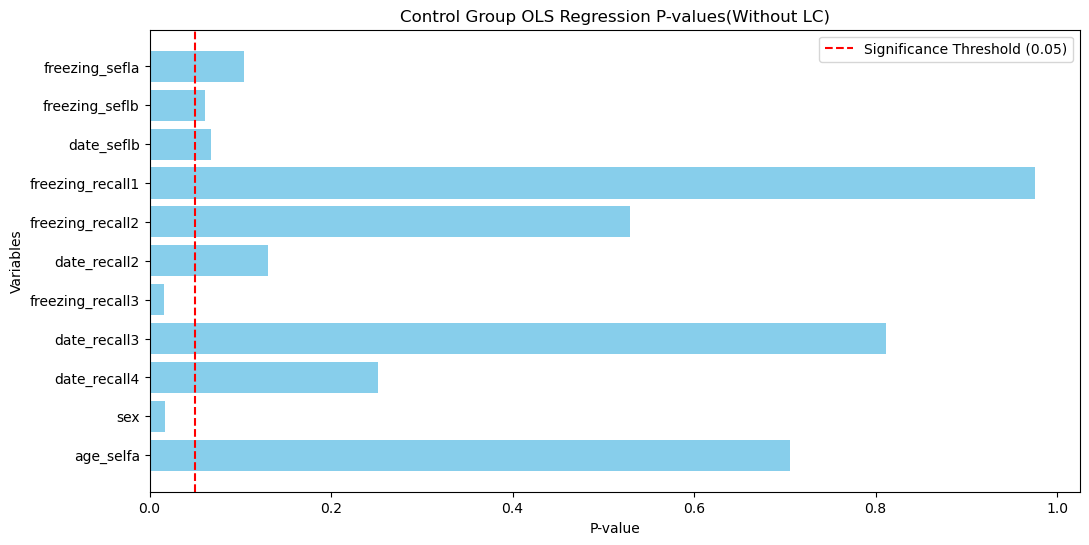

In [61]:
## extract the p_value of each model
p_values = model.pvalues
p_values = p_values.to_frame().reset_index()
p_values.columns = ['feature', 'p_value']
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(p_values['feature'], p_values['p_value'], color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('P-value')
plt.ylabel('Variables')
plt.title('Control Group OLS Regression P-values(Without LC)')
plt.gca().invert_yaxis() 
plt.legend()
plt.show()

In [62]:

mse_con_without_test = sm.tools.eval_measures.mse(y_test, y_test_pred)

# Dictionary for the first model's MSE and identifiers
mse_con_without = {
    'name': 'CON_WITHOUT',  # Model or group name
    'method': 'OLS',       # Method used
    'mse': mse_con_without_test  # Calculated MSE
}

# Append this dictionary to the list
mse_list.append(mse_con_without)

### Machine Learning Methods

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}


model_mse = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mean_score = -np.mean(scores)
    model_mse[model_name] = mean_score

model_mse

{'Decision Tree Regressor': 221.107648,
 'Random Forest Regressor': 97.65151933019999,
 'Gradient Boosting Regressor': 158.6128566630855}

In [95]:
model_importances = {}
mse_details = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features_importance = dict(zip(X.columns, importances))
        sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
        model_importances[model_name] = sorted_importances
    else:
        model_importances[model_name] = "This model doesn't support feature importance."
        # Append to mse_list with the specified structure
    mse_entry = {
        'name': "CON_WITHOUT",  # Combine "SEFL_WITHOUT" with the model name
        'method': model_name,  # You might adjust this as needed
        'mse': test_mse
    }
    mse_list.append(mse_entry)

    mse_details[model_name] = {"Train MSE": train_mse, "Test MSE": test_mse}

for model_name, importances in model_importances.items():
    mse_info = mse_details[model_name]
    print(f"{model_name} MSE:")
    print(f"Train MSE: {mse_info['Train MSE']}")
    print(f"Test MSE: {mse_info['Test MSE']}\n")
    print(f"{model_name} feature importances:")
    for feature, importance in importances:
        print(f"{feature}: {importance}")
    print("\n")

Decision Tree Regressor MSE:
Train MSE: 0.0
Test MSE: 98.48925000000003

Decision Tree Regressor feature importances:
freezing_recall3: 0.6848975826171182
freezing_sefla: 0.2641055484396426
freezing_seflb: 0.04518143360894074
date_recall2: 0.00229770717744121
date_recall3: 0.0020856243550026877
freezing_recall1: 0.0006960210791643499
freezing_recall2: 0.0005777352783941154
date_recall4: 0.00015834744429618085
date_seflb: 0.0
sex: 0.0
age_selfa: 0.0


Random Forest Regressor MSE:
Train MSE: 10.522227868571454
Test MSE: 70.24445479000002

Random Forest Regressor feature importances:
freezing_recall3: 0.46973961798524855
freezing_sefla: 0.3313633530336401
freezing_recall2: 0.06885551455627284
freezing_recall1: 0.06762516052450754
freezing_seflb: 0.04913878974393381
date_recall4: 0.005105842036587063
date_recall3: 0.00307935653972898
sex: 0.0030011602305509725
age_selfa: 0.0013295391415719838
date_recall2: 0.0007616662079582646
date_seflb: 0.0


Gradient Boosting Regressor MSE:
Train MSE: 

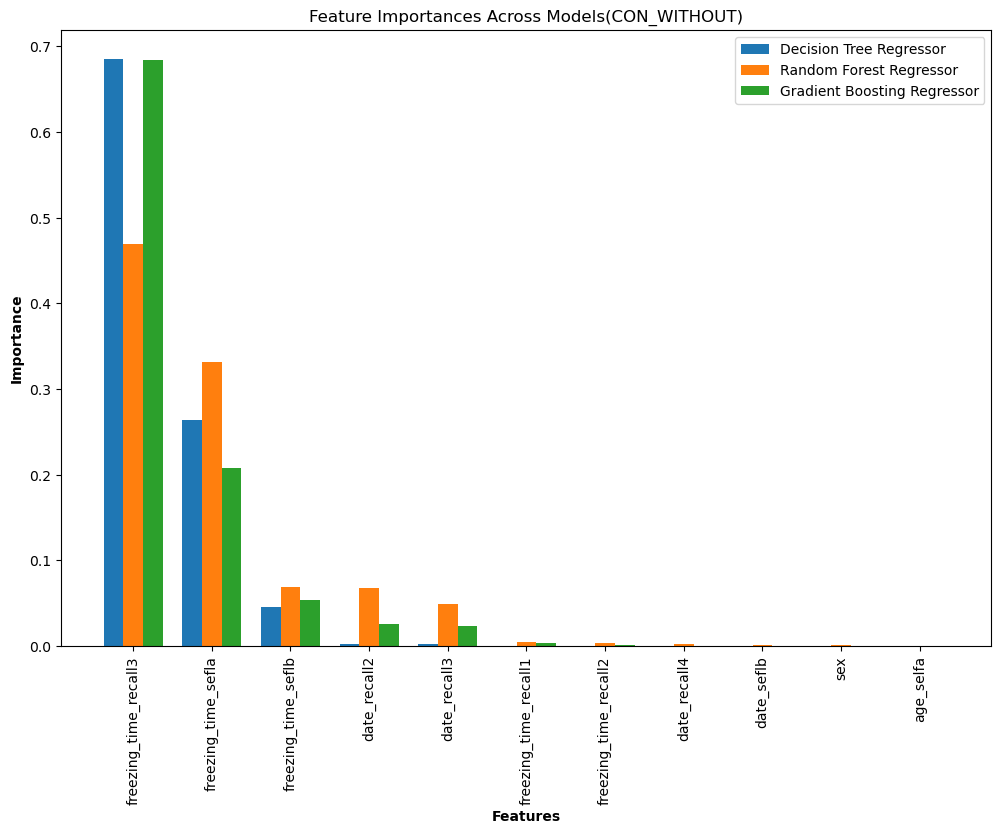

In [96]:
# Filter out models that don't support feature importance
valid_importances = {model: features for model, features in model_importances.items() if not isinstance(features, str)}

# Assuming all models have the same number and order of features, which should be ensured beforehand
feature_names = [feature for feature, _ in next(iter(valid_importances.values()))]
feature_names = [name.replace('freezing_', 'freezing_time_') for name in feature_names]
# Number of models and features
n_models = len(valid_importances)
n_features = len(feature_names)

# Creating a bar width and positions
barWidth = 1 / (n_models + 1)
positions = np.arange(n_features)

# Create figure and axis
plt.figure(figsize=(12, 8))

for i, (model_name, importances) in enumerate(valid_importances.items()):
    # Assuming the order of features is consistent across models, extract just the importances
    feature_importances = [importance for _, importance in importances]
    # Calculate position for each bar
    barPositions = [x + (i * barWidth) for x in positions]

    # Plot
    plt.bar(barPositions, feature_importances, width=barWidth, label=model_name)

# Adding labels and title
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Feature Importances Across Models(CON_WITHOUT)')

# Adding ticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(n_features)], feature_names, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.show()

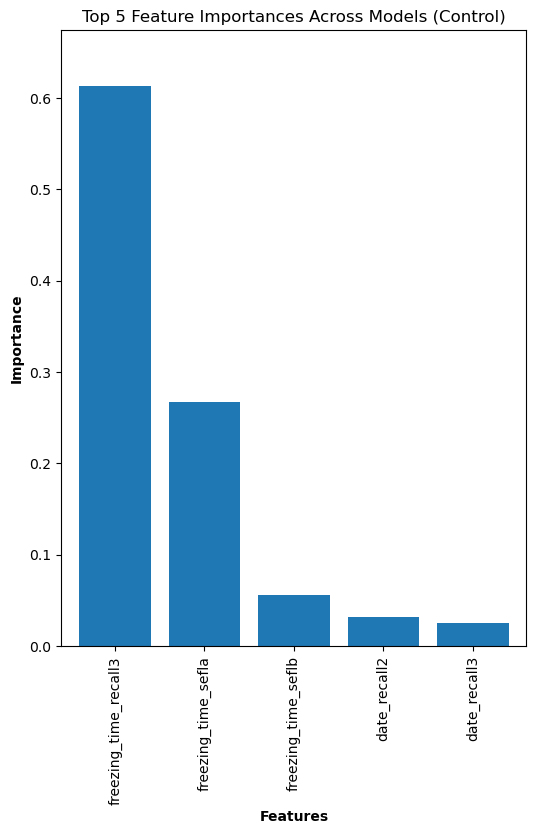

In [97]:
# 计算所有模型的平均重要性
n_features = len(feature_names)
average_importances = np.zeros(n_features)
for importances in valid_importances.values():
    average_importances += np.array([importance for _, importance in importances])
average_importances /= len(valid_importances)

# 确定前5个特征
top_indices = np.argsort(average_importances)[-5:][::-1]
top_feature_names = [feature_names[i] for i in top_indices]
top_average_importances = average_importances[top_indices]

# 创建图形和轴
plt.figure(figsize=(6, 8))

# 绘制前5个特征的平均重要性
barWidth = 0.4
positions = np.arange(len(top_feature_names))*0.5

plt.bar(positions, top_average_importances, width=barWidth)

# 添加标签和标题
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Top 5 Feature Importances Across Models (Control)')

# 添加刻度标签
plt.xticks(positions, top_feature_names, rotation=90)

# 设置xlim和ylim
plt.xlim(-0.3, len(top_feature_names) - 2.7)
plt.ylim(0, max(top_average_importances) * 1.1)

# 显示图形
plt.show()

##Training with learning curve parameters


In [65]:
test_control_lc = test_1_control.merge(df_all_lc, on='cohort_id', how='inner')

In [67]:
from sklearn.linear_model import LinearRegression

# Preparing the independent variable (1 to 10)
X_lc = np.array(range(1, 11)).reshape(-1, 1)

# Placeholder for calculated beta_1 values
beta_1_values = []

# Loop through each row to calculate beta_1 for Shock01 to Shock10
for index, row in test_control_lc.iterrows():
    y = row[['Shock01', 'Shock02', 'Shock03', 'Shock04', 'Shock05',
             'Shock06', 'Shock07', 'Shock08', 'Shock09', 'Shock10']].values.reshape(-1, 1)
    model = LinearRegression().fit(X_lc, y)
    beta_1 = model.coef_[0][0]  # Extracting beta_1 (slope)
    beta_1_values.append(beta_1)

# Adding the beta_1 values as a new column to the dataframe
test_control_lc['beta_1'] = beta_1_values

# Dropping the original Shock columns
test_control_lc_para = test_control_lc.drop(columns=['Shock01', 'Shock02', 'Shock03', 'Shock04', 'Shock05',
                                  'Shock06', 'Shock07', 'Shock08', 'Shock09', 'Shock10'])

# Showing the modified dataframe
test_control_lc_para.head()

,cohort_id,freezing_sefla,freezing_seflb,date_seflb,freezing_recall1,date_recall1,freezing_recall2,date_recall2,freezing_recall3,date_recall3,freezing_recall4,date_recall4,sex,age_selfa,beta_1
0,ptsd2_81,5.03,0.45,1,8.28,2,7.12,5,7.57,7,6.61,21.0,1,0,-0.041939
1,ptsd2_82,8.83,4.20,1,28.80,2,11.14,5,3.22,7,2.24,21.0,1,0,0.665636
2,ptsd2_91,2.60,2.73,1,14.97,2,11.68,5,9.80,7,7.30,21.0,1,0,0.016061
3,ptsd2_92,1.91,2.53,1,14.42,2,3.11,5,2.94,7,14.89,21.0,1,0,-0.148667
4,ptsd3_2,6.15,1.72,1,19.43,2,14.30,5,18.87,7,11.77,16.0,1,1,0.944485


### OLS

In [68]:
# Prepare the independent variables (X) by dropping the dependent variable and the identifier
X = test_control_lc_para.drop(columns=['cohort_id', 'freezing_recall4'])
# Adding a constant for the intercept
X = sm.add_constant(X)

# Prepare the dependent variable (y)
y = test_control_lc_para['freezing_recall4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Perform OLS regression
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       freezing_recall4   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     5.813
Date:                Tue, 23 Jul 2024   Prob (F-statistic):            0.00132
Time:                        13:00:34   Log-Likelihood:                -77.361
No. Observations:                  27   AIC:                             180.7
Df Residuals:                      14   BIC:                             197.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
freezing_sefla       0.1002      0.289      0.346      0.734      -0.520       0.721
freezing_seflb      -0.7353      0.456     -1.614      0.129      -1.712       0.242
date_seflb          36.0842     11.097      3.252      0.006      12.283      59.886
freezing_recall1    -0.1268      0.164     -0.773      0.452      -0.479       0.225
date_recall1         3.0016      3.960      0.758      0.461      -5.493      11.496
freezing_recall2    -0.1535      0.205     -0.747      0.467      -0.594       0.287
date_recall2        -6.8124      5.654     -1.205      0.248     -18.940       5.315
freezing_recall3     0.4430      0.130      3.413      0.004       0.165       0.721
date_recall3         1.3487      1.319      1.023      0.324      -1.480       4.177
date_recall4         1.1621      1.000      1.162      0.265      -0.983       3.307
sex                -32.1962      9.866     -3.263      0.006     -53.356     -11.036
age_selfa            3.1675      5.938      0.533      0.602      -9.568      15.903
beta_1               1.7703      1.525      1.161      0.265      -1.501       5.042
==============================================================================
Omnibus:                        2.789   Durbin-Watson:                   2.551
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.450
Skew:                           0.688   Prob(JB):                        0.294
Kurtosis:                       2.466   Cond. No.                         604.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

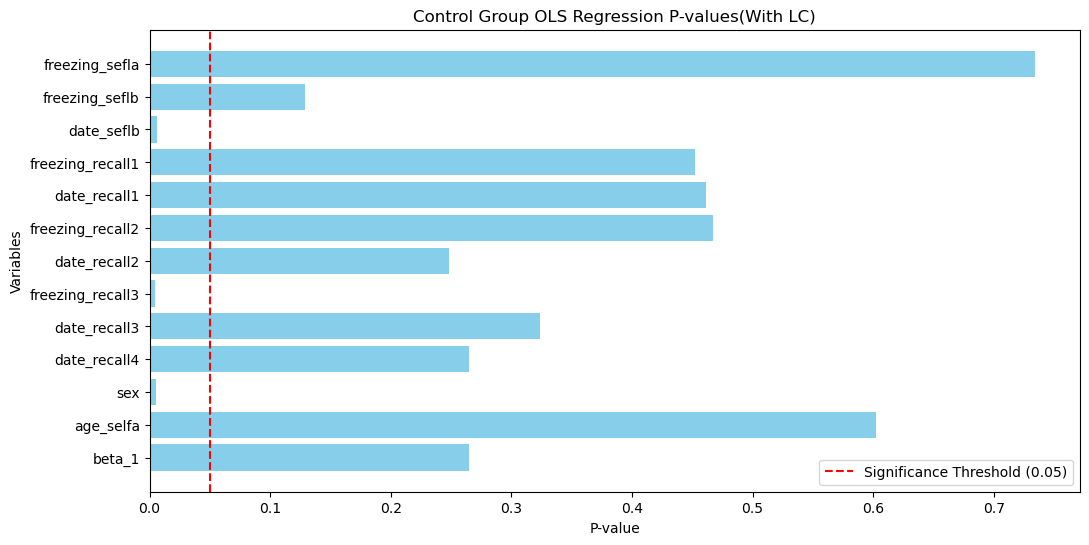

In [71]:
## extract the p_value of each model
p_values = model.pvalues
p_values = p_values.to_frame().reset_index()
p_values.columns = ['feature', 'p_value']
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(p_values['feature'], p_values['p_value'], color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('P-value')
plt.ylabel('Variables')
plt.title('Control Group OLS Regression P-values(With LC)')
plt.gca().invert_yaxis() 
plt.legend()
plt.show()

In [ ]:
# Fit OLS model
ols_model = OLS(y_train, sm.add_constant(X_train)).fit()

# Get OLS predictions for the test set
y_pred_ols = ols_model.predict(sm.add_constant(X_test))

# Get standard errors of predictions
pred_stderr = ols_model.get_prediction(sm.add_constant(X_test)).se_obs

# Calculate the 95% confidence interval for the predictions
ci_lower = y_pred_ols - 1.96 * pred_stderr
ci_upper = y_pred_ols + 1.96 * pred_stderr

# Checking how many of the actual test values fall within the 95% confidence interval
inside_ci = np.sum((y_test >= ci_lower) & (y_test <= ci_upper))
percentage_inside_ci = (inside_ci / len(y_test)) * 100

percentage_inside_ci

100.0

In [ ]:
mse_con_with_test = sm.tools.eval_measures.mse(y_test, y_pred_ols)

# Dictionary for the first model's MSE and identifiers
mse_con_with = {
    'name': 'CON_WITH_PARA',  # Model or group name
    'method': 'OLS',       # Method used
    'mse': mse_con_with_test  # Calculated MSE
}

# Append this dictionary to the list
mse_list.append(mse_con_with)

### Machine Learning Methods

In [ ]:
# Re-defining the models dictionary
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Re-running the evaluation for each model
model_mse = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
    mean_score = -np.mean(scores)
    model_mse[model_name] = mean_score

model_importances = {}
mse_details = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features_importance = dict(zip(X.columns, importances))
        sorted_importances = sorted(features_importance.items(), key=lambda x: x[1], reverse=True)
        model_importances[model_name] = sorted_importances
    else:
        model_importances[model_name] = "This model doesn't support feature importance."

    mse_details[model_name] = {"Train MSE": train_mse, "Test MSE": test_mse}

    mse_entry = {
        'name': f"CON_WITH_PARA",  # Combine "SEFL_WITHOUT" with the model name
        'method': model_name,  # You might adjust this as needed
        'mse': test_mse
    }
    mse_list.append(mse_entry)

model_mse, model_importances, mse_details

({'Decision Tree Regressor': 233.30635266666667,
  'Random Forest Regressor': 96.1207558342667,
  'Gradient Boosting Regressor': 131.97505517632058},
 {'Decision Tree Regressor': [('freezing_recall3', 0.6493345378074677),
   ('beta_1', 0.27491862093914476),
   ('freezing_recall2', 0.04982781083456733),
   ('freezing_sefla', 0.018855686883190587),
   ('date_recall1', 0.0029645682845383177),
   ('freezing_seflb', 0.0027413772186264153),
   ('freezing_recall1', 0.0013300305723915494),
   ('date_recall4', 2.736746007339694e-05),
   ('date_seflb', 0.0),
   ('date_recall2', 0.0),
   ('date_recall3', 0.0),
   ('sex', 0.0),
   ('age_selfa', 0.0)],
  'Random Forest Regressor': [('freezing_recall3', 0.4856435248198035),
   ('freezing_sefla', 0.1819538213885723),
   ('beta_1', 0.1095015658957177),
   ('freezing_recall1', 0.09547280221789543),
   ('freezing_recall2', 0.05818382993126367),
   ('freezing_seflb', 0.05341004878823032),
   ('sex', 0.0048215226994077),
   ('date_recall1', 0.003193732061

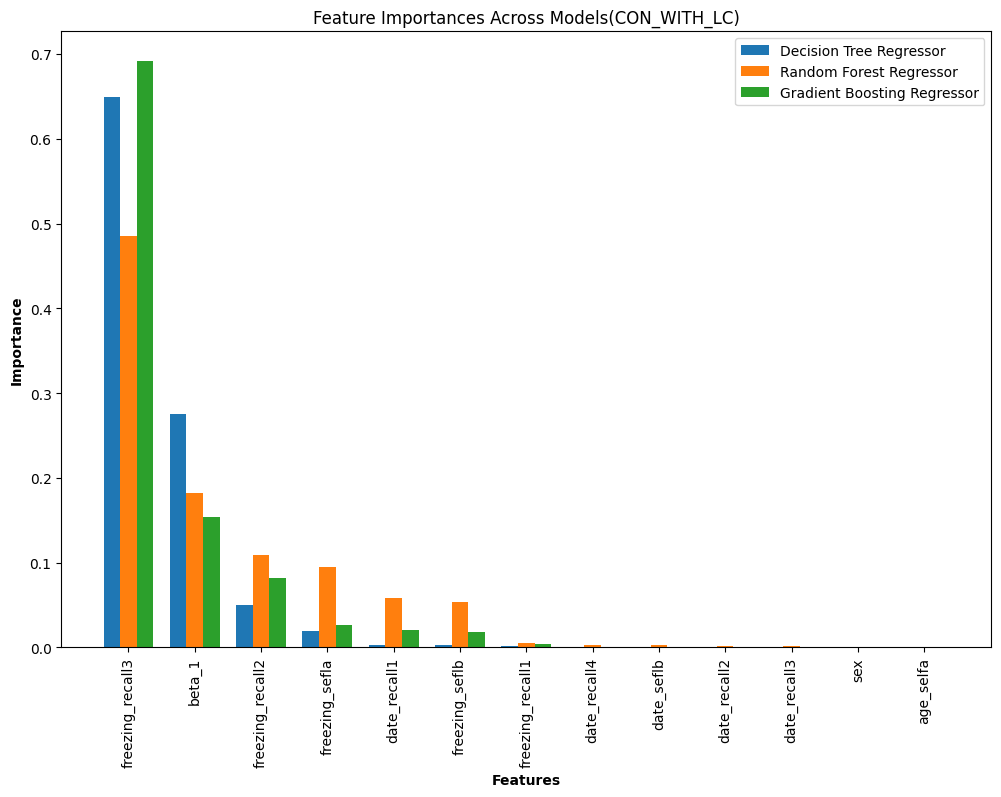

In [ ]:
# Filter out models that don't support feature importance
valid_importances = {model: features for model, features in model_importances.items() if not isinstance(features, str)}

# Assuming all models have the same number and order of features, which should be ensured beforehand
feature_names = [feature for feature, _ in next(iter(valid_importances.values()))]

# Number of models and features
n_models = len(valid_importances)
n_features = len(feature_names)

# Creating a bar width and positions
barWidth = 1 / (n_models + 1)
positions = np.arange(n_features)

# Create figure and axis
plt.figure(figsize=(12, 8))

for i, (model_name, importances) in enumerate(valid_importances.items()):
    # Assuming the order of features is consistent across models, extract just the importances
    feature_importances = [importance for _, importance in importances]
    # Calculate position for each bar
    barPositions = [x + (i * barWidth) for x in positions]

    # Plot
    plt.bar(barPositions, feature_importances, width=barWidth, label=model_name)

# Adding labels and title
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Importance', fontweight='bold')
plt.title('Feature Importances Across Models(CON_WITH_LC)')

# Adding ticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(n_features)], feature_names, rotation=90)

# Create legend & Show graphic
plt.legend()
plt.show()

# Visualization of all results

In [ ]:
mse_df = pd.DataFrame(mse_list)
mse_df

,name,method,mse
0,SEFL_WITHOUT,OLS,210.809056
1,SEFL_WITHOUT,Decision Tree Regressor,248.619300
2,SEFL_WITHOUT,Random Forest Regressor,252.835014
3,SEFL_WITHOUT,Gradient Boosting Regressor,276.158120
4,SEFL_WITH_PARA,OLS,454.530979
5,SEFL_WITH_PARA,Decision Tree Regressor,322.673500
6,SEFL_WITH_PARA,Random Forest Regressor,374.543277
7,SEFL_WITH_PARA,Gradient Boosting Regressor,406.255369
8,CON_WITHOUT,OLS,37.590106
9,CON_WITHOUT,Decision Tree Regressor,103.157700


<ipython-input-251-3e28a3da4bf1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=mse_df, x='mse', y='method', inner='stick', palette='colorblind')


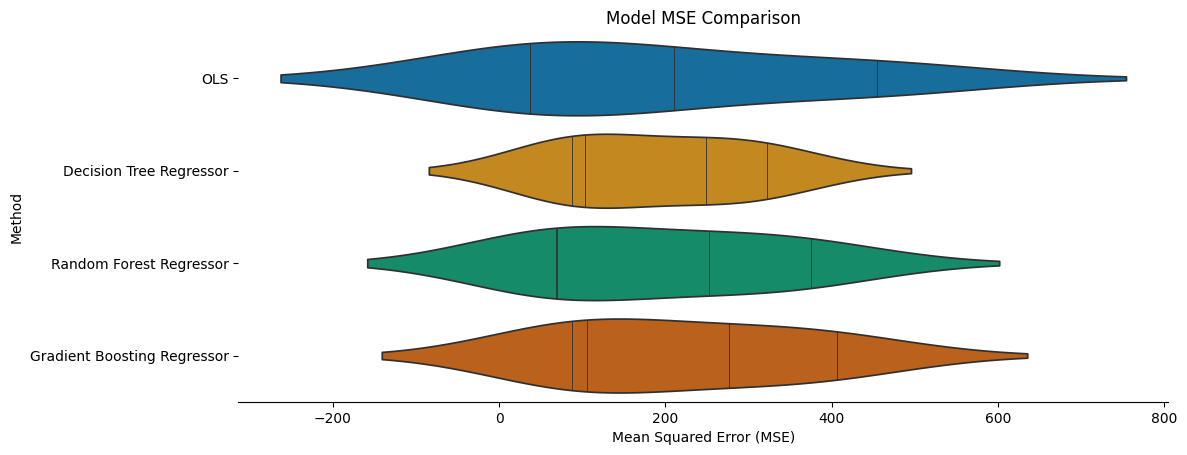

In [ ]:
figsize = (12, 1.2 * len(mse_df['method'].unique()))
plt.figure(figsize=figsize)

# Using the 'colorblind' palette
sns.violinplot(data=mse_df, x='mse', y='method', inner='stick', palette='colorblind')
sns.despine(top=True, right=True, left=True)

# Optional: Adding more descriptive title and labels
plt.title('Model MSE Comparison')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Method')

plt.show()

<ipython-input-252-44c05a3b8511>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='method', y='mse', palette='colorblind')
<ipython-input-252-44c05a3b8511>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='method', y='mse', palette='colorblind')
<ipython-input-252-44c05a3b8511>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='method', y='mse', palette='colorblind')
<ipython-input-252-44c05a3b8511>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

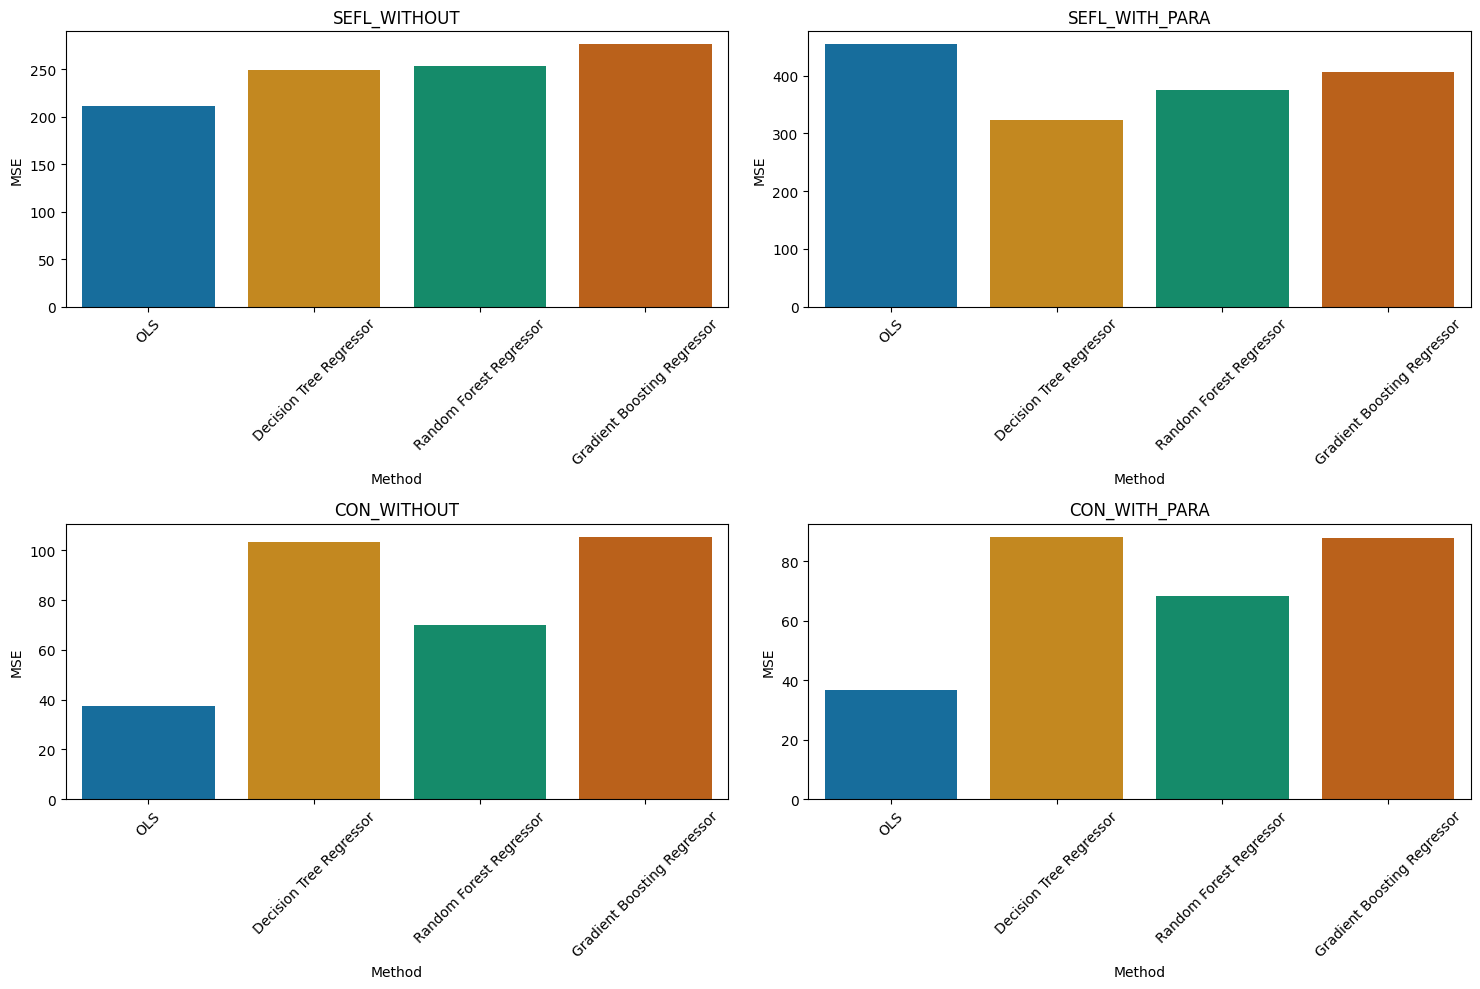

In [ ]:
plt.figure(figsize=(15, 10))

for i, name in enumerate(mse_df['name'].unique()):
    plt.subplot(2, 2, i+1)
    df_filtered = mse_df[mse_df['name'] == name]
    sns.barplot(data=df_filtered, x='method', y='mse', palette='colorblind')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.ylabel('MSE')
    plt.xlabel('Method')

plt.tight_layout()